# Comparison

<br/>
<div class="alert alert-block alert-warning" style="padding:1em">
<b>Compare two GPS track:</b> to be continued</div>

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as trk

code running in a no qgis environment
Code running in a no qgis environment


On construit les traces

(-1.0, 7.0)

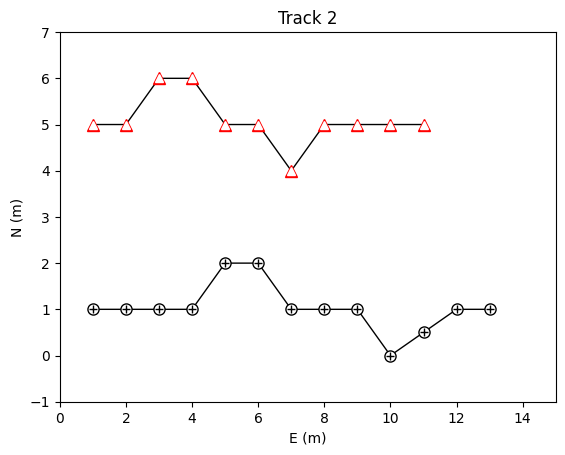

In [2]:
trk.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
        
# ---------------------------------------------------------------------
trace1 = trk.Track([], 1)
        
p1 = trk.Obs(trk.ENUCoords(1.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:00"))
trace1.addObs(p1)
        
p2 = trk.Obs(trk.ENUCoords(2.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:05"))
trace1.addObs(p2)
        
p3 = trk.Obs(trk.ENUCoords(3.0, 6.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:10"))
trace1.addObs(p3)
        
p4 = trk.Obs(trk.ENUCoords(4.0, 6.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:15"))
trace1.addObs(p4)
        
p5 = trk.Obs(trk.ENUCoords(5.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:20"))
trace1.addObs(p5)
        
p6 = trk.Obs(trk.ENUCoords(6.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:25"))
trace1.addObs(p6)
        
p7 = trk.Obs(trk.ENUCoords(7.0, 4.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:30"))
trace1.addObs(p7)
        
p8 = trk.Obs(trk.ENUCoords(8.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:35"))
trace1.addObs(p8)
        
p9 = trk.Obs(trk.ENUCoords(9.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:40"))
trace1.addObs(p9)
        
p10 = trk.Obs(trk.ENUCoords(10.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:45"))
trace1.addObs(p10)
        
p11 = trk.Obs(trk.ENUCoords(11.0, 5.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:50"))
trace1.addObs(p11)
        
# ---------------------------------------------------------------------
trace2 = trk.Track([], 2)
        
r1 = trk.Obs(trk.ENUCoords(1.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:00"))
trace2.addObs(r1)
        
r2 = trk.Obs(trk.ENUCoords(2.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:05"))
trace2.addObs(r2)
        
r3 = trk.Obs(trk.ENUCoords(3.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:10"))
trace2.addObs(r3)
        
r4 = trk.Obs(trk.ENUCoords(4.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:15"))
trace2.addObs(r4)
        
r5 = trk.Obs(trk.ENUCoords(5.0, 2.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:20"))
trace2.addObs(r5)
        
r6 = trk.Obs(trk.ENUCoords(6.0, 2.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:25"))
trace2.addObs(r6)
        
r7 = trk.Obs(trk.ENUCoords(7.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:30"))
trace2.addObs(r7)
        
r8 = trk.Obs(trk.ENUCoords(8.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:35"))
trace2.addObs(r8)
        
r9 = trk.Obs(trk.ENUCoords(9.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:40"))
trace2.addObs(r9)
        
r10 = trk.Obs(trk.ENUCoords(10.0, 0.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:40"))
trace2.addObs(r10)
        
r11 = trk.Obs(trk.ENUCoords(11.0, 0.5, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:45"))
trace2.addObs(r11)
        
r12 = trk.Obs(trk.ENUCoords(12.0, 1.0, 0), trk.ObsTime.readTimestamp("2018-01-01 10:00:50"))
trace2.addObs(r12)
        
d13 = trk.ENUCoords(13.0, 1.0, 0)
r13 = trk.Obs(d13, trk.ObsTime.readTimestamp("2018-01-01 10:00:55"))
trace2.addObs(r13)

trace1.plot()
trace1.plotAsMarkers(type=trk.MARKERS_TYPE_WARNING)
trace2.plot()
trace2.plotAsMarkers()

plt.xlim([0, 15])
plt.ylim([-1, 7])

### Profile of difference between two traces

with DTW (Dynamic Time Warping) method

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


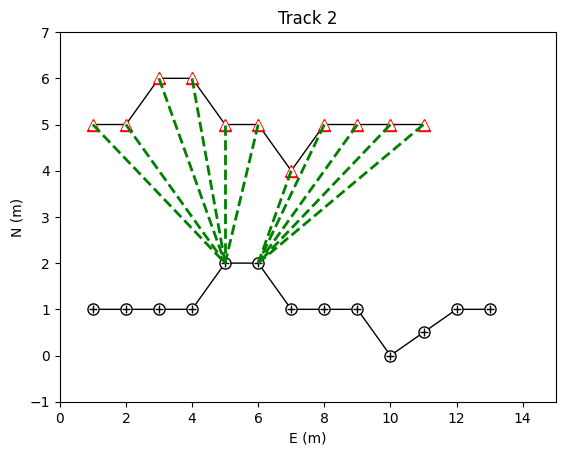

In [3]:
profile = trk.differenceProfile(trace1, trace2, mode = "DTW", p=2)

trace1.plot()
trace1.plotAsMarkers(type=trk.MARKERS_TYPE_WARNING)
trace2.plot()
trace2.plotAsMarkers()

plt.xlim([0, 15])
plt.ylim([-1, 7])

trk.plotDifferenceProfile(profile, trace2)
plt.show()

### Computes central track of a track collection

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


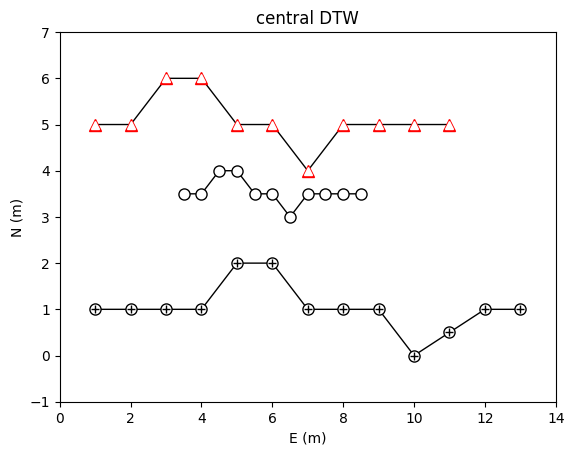

In [4]:
collection = trk.TrackCollection([trace1, trace2])
central = trk.centralTrack(collection, mode = "DTW")
        
central.plot()
central.plotAsMarkers(frg="k", bkg="w", sym_frg=" ", sym_bkg="o")

trace1.plot()
trace1.plotAsMarkers(type=trk.MARKERS_TYPE_WARNING)
trace2.plot()
trace2.plotAsMarkers()

plt.title('central DTW')
plt.xlim([0, 14])
plt.ylim([-1, 7])
plt.show()   